In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
import seaborn as sns

In [12]:
dataset = pd.read_csv('datasets/Mall_Customers (1).csv')
datasetcopy = dataset.copy()
datasetcopy.dropna(inplace=True)
print(datasetcopy)
X = datasetcopy.iloc[:, [3, 4]].values

print(X)


     CustomerID   Genre   Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male  19.0                15.0                      39
1             2    Male  21.0                15.0                      81
3             4  Female  23.0                16.0                      77
4             5  Female  31.0                17.0                      40
5             6  Female  22.0                17.0                      76
..          ...     ...   ...                 ...                     ...
195         196  Female  35.0               120.0                      79
196         197  Female  45.0               126.0                      28
197         198    Male  32.0               126.0                      74
198         199    Male  32.0               137.0                      18
199         200    Male  30.0               137.0                      83

[199 rows x 5 columns]
[[ 15.  39.]
 [ 15.  81.]
 [ 16.  77.]
 [ 17.  40.]
 [ 17.  76.]
 [ 18.   6.]
 [ 18.  94

In [13]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

'''Inertia measures how well a dataset was clustered by K-Means.
 It is calculated by measuring the distance between each data point and its centroid, 
 squaring this distance, and summing these squares across one cluster.
  A good model is one with low inertia AND a low number of clusters ( K )'''

c:\Users\rrajn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rrajn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rrajn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rrajn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

'Inertia measures how well a dataset was clustered by K-Means.\n It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.\n  A good model is one with low inertia AND a low number of clusters ( K )'

<Axes: >

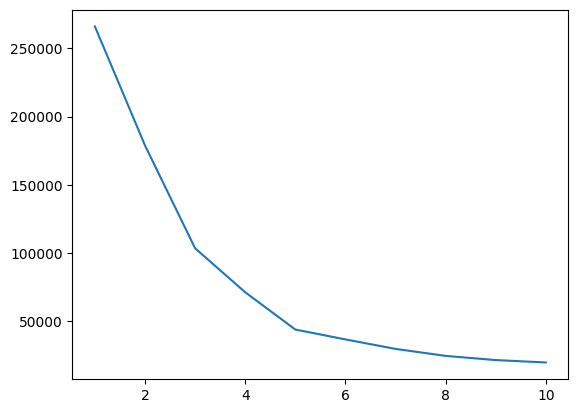

In [14]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss)

In [15]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

c:\Users\rrajn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


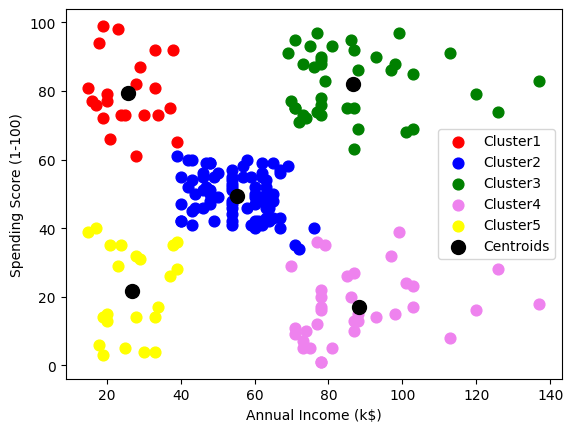

In [16]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() 

plt.show()